# Задание 3.

Загрузите [данные по изменению температуры поверхности земли](https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data). Для этого может понадобится зарегистрироваться на [Kaggle](https://kaggle.com). Затем нужно будет работать с данными, которые содержатся в файле **GlobalLandTemperaturesByMajorCity.csv**

In [75]:
import zipfile
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the default figure size to be larger
sns.set_context("notebook", font_scale=1.2, rc={"figure.figsize": (14, 8)})

%matplotlib inline

with zipfile.ZipFile("archive.zip") as z:
    with z.open("GlobalLandTemperaturesByMajorCity.csv") as f:
        df = pd.read_csv(f, parse_dates=["dt"])

df

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Задание 3.1 (1 балл)

В последующих заданиях будут учитываться данные начиная с 01.01.1950. Для этого создайте новый `DataFrame`, в котором удалены все строки до 01.01.1950. Используйте созданный DataFrame в последующих заданиях.  

In [76]:
data = df[df["dt"] >= "01.01.1950"]
data

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
1212,1950-01-01,26.773,0.239,Abidjan,Côte D'Ivoire,5.63N,3.23W
1213,1950-02-01,27.527,0.348,Abidjan,Côte D'Ivoire,5.63N,3.23W
1214,1950-03-01,28.344,0.431,Abidjan,Côte D'Ivoire,5.63N,3.23W
1215,1950-04-01,27.830,0.467,Abidjan,Côte D'Ivoire,5.63N,3.23W
1216,1950-05-01,26.896,0.248,Abidjan,Côte D'Ivoire,5.63N,3.23W
...,...,...,...,...,...,...,...
239172,2013-05-01,18.979,0.807,Xian,China,34.56N,108.97E
239173,2013-06-01,23.522,0.647,Xian,China,34.56N,108.97E
239174,2013-07-01,25.251,1.042,Xian,China,34.56N,108.97E
239175,2013-08-01,24.528,0.840,Xian,China,34.56N,108.97E


# Задание 3.2 (2 балла)

Постройте график среднегодовых температур в городе Торонто.

Text(0.5, 1.0, 'Среднегодовая температура в toronto')

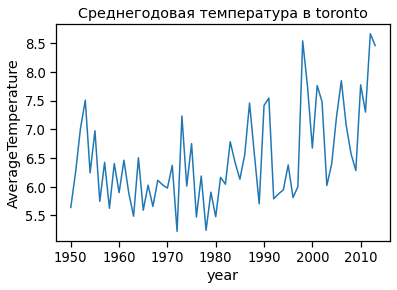

In [77]:
data["month"] = data["dt"].dt.month
data["year"] = data["dt"].dt.year

toronto_temp_data = data[data["City"] == "Toronto"].groupby('year').agg('mean').reset_index()
sns.lineplot(x="year", y="AverageTemperature", data=toronto_temp_data)
plt.title("Среднегодовая температура в toronto")


# Задание 3.3 (2 балла)

Найдите город, для которого выборочная дисперсия температур на приведенных данных максимальна. 

In [78]:
# We use sorting, since max will give us only one maximum,
# and sorting will give out several, if there are any
city_var = (
    data.groupby("City").agg("var")["AverageTemperature"].sort_values(ascending=False)
)
city_var


City
Harbin       218.898616
Changchun    194.600476
Shenyang     148.080952
Montreal     122.204179
Peking       120.585595
                ...    
Surabaya       0.446827
Cali           0.396163
Bogotá         0.395371
Singapore      0.385006
Jakarta        0.296116
Name: AverageTemperature, Length: 100, dtype: float64

In [79]:
print("Наибольшая выборочная дисперсия температур в городе", city_var.index.values[0])


Наибольшая выборочная дисперсия температур в городе Harbin


# Задание 3.4 (4 балла)

На одной оси постройте графики, отображающие:
1. Зависимость выборочной дисперсии температур от широты города (Latitude).
2. Зависимость средней температуры в январе 1975 года от широты города (Latitude).
3. Зависимость средней температуры в июле 1975 года от широты города (Latitude).

In [80]:
january_data = data[(data["month"] == 1) & (data["year"] == 1975)]
july_data = data[(data["month"] == 7) & (data["year"] == 1975)]



In [81]:
data_var = data.groupby("Latitude").agg("var")["AverageTemperature"]
data_var = data_var.reset_index()
data_var.head()


,Latitude,AverageTemperature
0,0.80N,0.385006
1,0.80S,1.113127
2,10.45N,1.151285
3,12.05N,6.781689
4,12.05S,7.281631


In [82]:
january_data_var = january_data.groupby("Latitude").agg("mean")["AverageTemperature"]
january_data_var = january_data_var.reset_index().dropna(how="any")
january_data_var.head()


,Latitude,AverageTemperature
0,0.80N,26.2290
1,0.80S,16.9910
2,10.45N,26.5990
3,12.05N,20.7455
4,12.05S,19.6010


In [83]:
july_data_var = july_data.groupby("Latitude").agg("mean")["AverageTemperature"]
july_data_var = july_data_var.reset_index().dropna(how="any")
july_data_var.head()


,Latitude,AverageTemperature
0,0.80N,26.4130
1,0.80S,14.8510
2,10.45N,28.4000
3,12.05N,24.9835
4,12.05S,13.8880


In [84]:
def latitude_to_num(s: str) -> float:
    if "S" in s:
        return -1 * float(s.replace("S", ""))

    if "N" in s:
        return float(s.replace("N", ""))

    raise ValueError("It's not the correct latitude")

def longitude_to_num(s: str) -> float:
    if "W" in s:
        return -1 * float(s.replace("W", ""))
    if "E" in s:
        return float(s.replace("E", ""))

    raise ValueError("It's not the correct longitude")


data_var.Latitude = data_var.Latitude.apply(latitude_to_num)
january_data_var.Latitude = january_data_var.Latitude.apply(latitude_to_num)
july_data_var.Latitude = july_data_var.Latitude.apply(latitude_to_num)


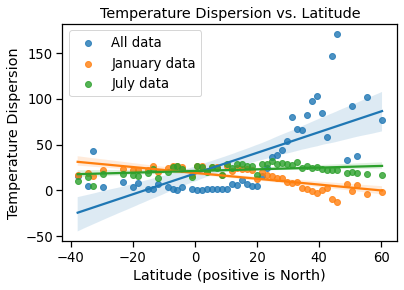

In [85]:
sns.regplot(x="Latitude", y="AverageTemperature", data=data_var, label="All data")
sns.regplot(
    x="Latitude", y="AverageTemperature", data=january_data_var, label="January data"
)
sns.regplot(x="Latitude", y="AverageTemperature", data=july_data_var, label="July data")

# Add a legend, a title and axis labels
plt.legend()
plt.title("Temperature Dispersion vs. Latitude")
plt.xlabel("Latitude (positive is North)")
plt.ylabel("Temperature Dispersion")

# Show the plot
plt.show()


# Задание 3.5 (6 баллов)

Посчитайте данные по среднегодовой температуре в Санкт-Петербурге. Определите года, в которых средняя температура была выше, чем в предыдущем  и последующем году. Постройте график среднегодовой температуры и обозначьте на нём найденные года (произвольным образом). 

Постройте модель линейной регрессии (можно использовать [LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)): $\mathbb{год} \rightarrow \mathbb{средняя\_температура}$. Отобразите прямую на предыдущем графике. 

In [86]:
sbp_data = data[data["City"] == "Saint Petersburg"]
sbp_data_var = sbp_data.groupby("year").agg("mean")["AverageTemperature"]
sbp_data_var = sbp_data_var.reset_index()
sbp_data_var.head()



,year,AverageTemperature
0,1950,4.424083
1,1951,4.308250
2,1952,3.749333
3,1953,4.840083
4,1954,4.454000


In [87]:
sbp_data_var["AverageTemperature_shift_1"] = sbp_data_var.AverageTemperature.shift(1)
sbp_data_var["AverageTemperature_shift_-1"] = sbp_data_var.AverageTemperature.shift(-1)
sbp_data_var = sbp_data_var.dropna(how="any")
sbp_data_var.head()


,year,AverageTemperature,AverageTemperature_shift_1,AverageTemperature_shift_-1
1,1951,4.308250,4.424083,3.749333
2,1952,3.749333,4.308250,4.840083
3,1953,4.840083,3.749333,4.454000
4,1954,4.454000,4.840083,3.001667
5,1955,3.001667,4.454000,2.565500


In [88]:
spb_mask = (
    sbp_data_var["AverageTemperature"] > sbp_data_var["AverageTemperature_shift_1"]
) & (sbp_data_var["AverageTemperature"] > sbp_data_var["AverageTemperature_shift_-1"])

masked_spb_data_var = sbp_data_var[spb_mask]
masked_spb_data_var

,year,AverageTemperature,AverageTemperature_shift_1,AverageTemperature_shift_-1
3,1953,4.840083,3.749333,4.454000
7,1957,4.856250,2.565500,3.261833
9,1959,5.026000,3.261833,4.108250
11,1961,5.842083,4.108250,4.038250
14,1964,4.414167,3.483583,3.702167
17,1967,4.618667,2.841167,3.449000
22,1972,5.294333,4.157750,4.421500
25,1975,5.885250,5.642583,2.598917
27,1977,3.946250,2.598917,2.695750
29,1979,4.060583,2.695750,3.655833


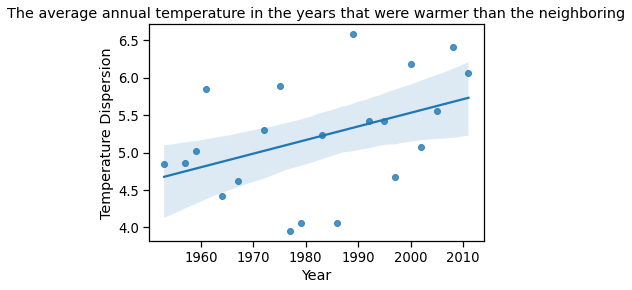

In [89]:
sns.regplot(x="year", y="AverageTemperature", data=masked_spb_data_var)

# Add a legend, a title and axis labels
plt.title("The average annual temperature in the years that were warmer than the neighboring")
plt.xlabel("Year")
plt.ylabel("Temperature Dispersion")

# Show the plot
plt.show()

In [90]:
# Since we have already drawn a linear regression model, we will simply build a model

import statsmodels.api as sm

# Create a formula for the regression
formula = "AverageTemperature ~ year"

# Fit the regression model
model = sm.OLS.from_formula(formula, data=masked_spb_data_var)
result = model.fit()

# Print the summary of the model
print(result.summary())


                            OLS Regression Results                            
Dep. Variable:     AverageTemperature   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     4.183
Date:                Wed, 18 Jan 2023   Prob (F-statistic):             0.0549
Time:                        17:05:41   Log-Likelihood:                -21.751
No. Observations:                  21   AIC:                             47.50
Df Residuals:                      19   BIC:                             49.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -30.8498     17.632     -1.750      0.0

# Задание 3.6 (4 балла)

Найдите города, для которых: 
1. Разница между максимальным и минимальным значением среднегодовой температуры в выборке максимальна.
2. Самая большая средняя разница между средней температурой января и средней температурой июля.
3. Наибольшее среднее количество месяцев с отрицательной температурой в году.

In [91]:
# Group the data by city
grouped = data.groupby("City")

# Calculate the maximum and minimum temperature values for each city
max_temp = grouped["AverageTemperature"].max()
min_temp = grouped["AverageTemperature"].min()

# Calculate the difference between the maximum and minimum temperature values
temp_diff = max_temp.subtract(min_temp)

# Find the city with the maximum temperature difference
max_diff_city = temp_diff.idxmax()

print(f"The city with the maximum temperature difference is {max_diff_city}.")

The city with the maximum temperature difference is Harbin.


In [92]:
grouped = data.groupby(["City", "month"])

# Calculate the maximum and minimum temperature values for each city
max_temp = grouped["AverageTemperature"].max()
max_temp.idxmax()

('Baghdad', 7)

In [93]:
temp_diff.sort_values(ascending=False)

City
Harbin              49.279
Changchun           46.542
Moscow              43.523
Shenyang            41.216
Saint Petersburg    40.510
                     ...  
Lagos                4.058
Cali                 4.008
Bogotá               3.744
Singapore            3.665
Jakarta              3.363
Name: AverageTemperature, Length: 100, dtype: float64

In [94]:
# Group the data by city
grouped_jan = data[data['month'] == 1].groupby("City").agg("mean")
grouped_jul = data[data['month'] == 7].groupby("City").agg("mean")

# Calculate the average temperature for each city in January and July
jan_avg = grouped_jan["AverageTemperature"]
jul_avg = grouped_jul["AverageTemperature"]

# Calculate the difference between the average temperature in January and the average temperature in July
temp_diff = jan_avg.subtract(jul_avg).abs()

# Find the city with the maximum temperature difference
max_diff_city = temp_diff.idxmax()

print(f"The city with the maximum temperature difference (absolute) between January and July is {max_diff_city}.")

The city with the maximum temperature difference (absolute) between January and July is Harbin.


In [95]:
temp_diff.sort_values(ascending=False)

City
Harbin       41.992719
Changchun    39.603719
Shenyang     34.927016
Montreal     31.169109
Tianjin      30.658703
               ...    
Lagos         0.317484
Jakarta       0.289859
Surabaya      0.238172
Bogotá        0.200234
Cali          0.161625
Name: AverageTemperature, Length: 100, dtype: float64

In [96]:
data['is_minus_temp'] = data['AverageTemperature'] < 0

# Group the data by city
grouped_sum = data.groupby("City").sum()['is_minus_temp']
grouped_count = data.groupby("City").count()['is_minus_temp']

# I'm not sure that every city has the same number of temperature measurements.
# Therefore, we normalize the resulting value
result_df = grouped_sum / grouped_count
result_df

# Find the city with the maximum number of negative temperature months
max_neg_temp_city = result_df.idxmax()

print(f"The city with the highest average number of months with a negative temperature is {max_neg_temp_city}.")

The city with the highest average number of months with a negative temperature is Harbin.


In [97]:
result_df.sort_values(ascending=False)

City
Harbin              0.410458
Changchun           0.405229
Moscow              0.380392
Montreal            0.356863
Saint Petersburg    0.345098
                      ...   
Ho Chi Minh City    0.000000
Harare              0.000000
Guangzhou           0.000000
Gizeh               0.000000
Lagos               0.000000
Name: is_minus_temp, Length: 100, dtype: float64

# Задание 3.7 (3 балла)

Отобразите города на карте, например с помощью [geopandas/folium](https://geopandas.org/en/stable/gallery/plotting_with_folium.html) или [plotly](https://plotly.com/python-api-reference/generated/plotly.express.scatter_geo.html). Причем цвет метки должен соответствовать средней температуре в январе за последние 10 лет. 


**\***(+3 балла). Вычислите прямую с "трендом" по изменению средней температуры за год в каждом городе в период 1950-2013 (можно с помощью линейной регрессии, как в задании **3.5**). Отобразите города цветом, который зависит от угла наклона этой прямой. 


**\***(+1 балл) В дополнение к предыдущему пункту, используйте библиотеку [pwlf](https://pypi.org/project/pwlf/) с фиксированным числом сегментов и визуализируйте угол наклона последнего сегмента. 

In [98]:
jan_10_year_data = data[(data.month == 1) & (data.year > data.year.max() - 11)]
grouped_data = jan_10_year_data.groupby('City').agg('mean')[['AverageTemperature']]
grouped_data = grouped_data.join(data.set_index("City")[["Latitude", "Longitude"]]).drop_duplicates()
grouped_data.reset_index(inplace=True)
grouped_data.Latitude = grouped_data.Latitude.apply(latitude_to_num)
grouped_data.Longitude = grouped_data.Longitude.apply(longitude_to_num)
grouped_data


,City,AverageTemperature,Latitude,Longitude
0,Abidjan,27.310909,5.63,-3.23
1,Addis Abeba,18.221818,8.84,38.11
2,Ahmadabad,20.053000,23.31,72.52
3,Aleppo,6.077727,36.17,37.79
4,Alexandria,14.936636,31.35,30.16
...,...,...,...,...
90,Tokyo,1.756909,36.17,139.23
91,Toronto,-7.070000,44.20,-80.50
92,Umm Durman,23.381455,15.27,32.50
93,Wuhan,3.858182,29.74,114.46


In [99]:
import folium
import geopandas
import colour

heat = list(colour.Color("red").range_to(colour.Color("blue"), len(grouped_data.index)))

geometry = geopandas.points_from_xy(grouped_data.Longitude, grouped_data.Latitude)
df_geo = geopandas.GeoDataFrame(grouped_data, geometry=geometry)
f_map = folium.Map(zoom_start=10)
df_geo.apply(
    lambda row: folium.Marker(
        location=[row.Latitude, row.Longitude],
        icon=folium.Icon(
            color="black",
            icon_color=heat[row.name].hex,
        ),
    ).add_to(f_map),
    axis=1,
)

f_map


# *Задание 3.8 (8 баллов)

Цель - создать проект, который как минимум включает:
1. Использование юнит-тестов ([pytest](https://pytest.org)).
2. Применение средств форматирования и проверки исходного кода (например: [isort](https://pycqa.github.io/isort/), [black](https://black.readthedocs.io/en/stable/), [flake8](https://flake8.pycqa.org/en/latest/), [mypy](https://mypy.readthedocs.io/en/stable/)).
3. Спецификацию проекта в [pyproject.toml](https://pip.pypa.io/en/stable/reference/build-system/pyproject-toml/).
4. Использование утилит для работы с командной строкой ([argparse](https://docs.python.org/3/library/argparse.html), [click](https://click.palletsprojects.com/en/8.1.x/) и т.п.)
5. Сборку проекта в Wheel-файл.

Проект должен быть загружен в репозиторий. Функционал - произвольный, но должны использоваться данные из этого домашнего задания. Сам файл передается в качестве первого аргумента командной строки.  Например:

> python3 -m homeproject.app GlobalLandTemperaturesByMajorCity.csv 1980

Выдает самый жаркий месяц и город по наблюдениям за 1980 год.

*Ссылка на проект*
В папке с заданиями под названием "project"

## Задание с экзамена
Найдите пару городов, которые являются ближайшими соседями (по расстоянию) и у которых средняя температура января с 1970 по 1980 различается максимальным образом

In [100]:
ten_year_data = data[(data.year >= 1970) & (data.year <= 1980)]  # Берем интервал [1970, 1980]

# Mean aggregation
grouped_data = ten_year_data.groupby('City').agg('mean')[['AverageTemperature']]

# join lat and lon
grouped_data = grouped_data.join(data.set_index("City")[["Latitude", "Longitude"]]).drop_duplicates()
grouped_data.reset_index(inplace=True)
grouped_data.Latitude = grouped_data.Latitude.apply(latitude_to_num)
grouped_data.Longitude = grouped_data.Longitude.apply(longitude_to_num)
grouped_data

,City,AverageTemperature,Latitude,Longitude
0,Abidjan,26.324803,5.63,-3.23
1,Addis Abeba,17.570871,8.84,38.11
2,Ahmadabad,26.823598,23.31,72.52
3,Aleppo,17.699394,36.17,37.79
4,Alexandria,20.579152,31.35,30.16
...,...,...,...,...
90,Tokyo,12.756205,36.17,139.23
91,Toronto,5.985667,44.20,-80.50
92,Umm Durman,29.187523,15.27,32.50
93,Wuhan,16.948083,29.74,114.46


### Вариант 1

In [101]:
import numpy as np
import pandas as pd
from itertools import product

def haversine_distance(lat1, lon1, lat2, lon2):
    r = 6371
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return r * c

# Create an empty dataframe to store the results
distances = pd.DataFrame(columns=['City1', 'City2', 'AverageTemperature1', 'AverageTemperature2', 'Distance'])

# Get all possible combinations of cities
for city1, city2 in product(grouped_data.itertuples(), repeat=2):
    if city1 != city2:
        distance = haversine_distance(city1.Latitude, city1.Longitude, city2.Latitude, city2.Longitude)
        distances = distances.append({'City1': city1.City, 'City2': city2.City, 'AverageTemperature1': city1.AverageTemperature, 'AverageTemperature2': city2.AverageTemperature, 'Distance': distance}, ignore_index=True)

distances

,City1,City2,AverageTemperature1,AverageTemperature2,Distance
0,Abidjan,Addis Abeba,26.324803,17.570871,4571.868041
1,Abidjan,Ahmadabad,26.324803,26.823598,8306.800073
2,Abidjan,Aleppo,26.324803,17.699394,5380.947276
3,Abidjan,Alexandria,26.324803,20.579152,4501.031287
4,Abidjan,Ankara,26.324803,10.584689,5239.798465
...,...,...,...,...,...
8925,Xian,Tangshan,11.655455,11.769205,569.088334
8926,Xian,Tokyo,11.655455,12.756205,2738.656774
8927,Xian,Toronto,11.655455,5.985667,11205.152618
8928,Xian,Umm Durman,11.655455,29.187523,7829.367607


In [102]:
# Sort all distance and drop repeating values
# So we will get the nearest neighbors for each city. 
# Of course, if for city A city B is the nearest, then for city B, city A is also the nearest

distances = distances.sort_values("Distance")
distances.drop_duplicates("City1").reset_index(drop=True)

,City1,City2,AverageTemperature1,AverageTemperature2,Distance
0,Pune,Bombay,24.989864,26.960780,178.228591
1,Bombay,Pune,26.960780,24.989864,178.228591
2,Cali,Bogotá,22.054924,20.290788,178.583340
3,Bogotá,Cali,20.290788,22.054924,178.583340
4,Calcutta,Dhaka,26.374530,25.847258,178.706987
...,...,...,...,...,...
90,Lima,Cali,16.896106,22.054924,1789.794657
91,Dakar,Abidjan,24.771265,26.324803,1891.349614
92,Santiago,Lima,5.922689,16.896106,2442.190758
93,Los Angeles,Mexico,15.841417,15.884939,2519.329017


In [103]:
# Find max diff

distances['diff'] = abs(distances.AverageTemperature1 - distances.AverageTemperature2)
distances

,City1,City2,AverageTemperature1,AverageTemperature2,Distance,diff
6592,Pune,Bombay,24.989864,26.960780,178.228591,1.970917
1197,Bombay,Pune,26.960780,24.989864,178.228591,1.970917
1515,Cali,Bogotá,22.054924,20.290788,178.583340,1.764136
1049,Bogotá,Cali,20.290788,22.054924,178.583340,1.764136
1436,Calcutta,Dhaka,26.374530,25.847258,178.706987,0.527273
...,...,...,...,...,...,...
4708,Lima,Bangkok,16.896106,27.523303,19659.890638,10.627197
1073,Bogotá,Jakarta,20.290788,26.758909,19786.695594,6.468121
3771,Jakarta,Bogotá,26.758909,20.290788,19786.695594,6.468121
8913,Xian,Santiago,11.655455,5.922689,19807.348143,5.732765


In [104]:
max_index = distances['diff'].idxmax()
distances.loc[max_index]

City1                   Umm Durman
City2                       Harbin
AverageTemperature1      29.187523
AverageTemperature2       3.922871
Distance               9045.134699
diff                     25.264652
Name: 8681, dtype: object

In [105]:
result = distances.loc[max_index]
print(f'The closest cities with the largest temperature difference are {result.City1} and {result.City2}, with a distance of {result.Distance:.2f} km')

The closest cities with the largest temperature difference are Umm Durman and Harbin, with a distance of 9045.13 km


### Вариант 2

In [106]:
from itertools import combinations

def find_closest_cities(df):
    closest_cities = (None, None, None)
    max_temp_diff = -float('inf')
    for city1, city2 in combinations(df.itertuples(), 2):
        distance = haversine_distance(city1.Latitude, city1.Longitude, city2.Latitude, city2.Longitude)
        temp_diff = abs(city1.AverageTemperature - city2.AverageTemperature)
        if temp_diff > max_temp_diff:
            max_temp_diff = temp_diff
            closest_cities = (city1.City, city2.City, distance)
    return closest_cities

result = find_closest_cities(grouped_data)
print(f'The closest cities with the largest temperature difference are {result[0]} and {result[1]}, with a distance of {result[2]:.2f} km')

The closest cities with the largest temperature difference are Harbin and Umm Durman, with a distance of 9045.13 km
